# Sarvesh Vikas Tikekar (2022120037)
# CSL701- Machine Learning Assignment no: 2
# Roll no: 64

## This program uses the standard adult census income dataset from the SHAP dataset repository
## We train xgboost classifier using sci-kit learn and then explain the predictions using SHAP

**Note for Students:**
- Please write your answers in the space provided. **Do not forget to prefix your answer with #.** 
Else your answers will be interpreted as code by the Jupyter Notebook resulting in errors.
- **Run each cell one by one** as you go through the notebook. This will **strengthen your understanding** of the SHAP implementation. Also **it will help you with your answers**.
- You can also write answers along with the questions in a seperate file as instructed by the facilitator.

**XGBoost** is an an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

XGBoost can be used in a variety of applications, including Kaggle competitions, recommendation systems, and click-through rate prediction, among others. It is also highly customizable and allows for fine-tuning of various model parameters to optimize performance.

More about XGBoost can be read from this site - https://xgboost.readthedocs.io/en/stable/

The output of Decision Trees, Linear Regression, and Logistic Regression algorithms are easier to understand 
as compared to that of Random Forest and Neural Networks.

That is why ** SHAP** is commonly used to explain the output of **Random Forests, Neural Networks, and Ensemble Machine Learning models**.

XGBoost is an **Ensemble Machine Learning Algorithm** that will be used to solve this problem.

# Dataset Description

**Adult income dataset** is used that involves **predicting personal income levels as above or below $50,000 per year** based on 
personal details such as relationship and education level. 

There are **two class values ‘>50K‘ and ‘<=50K‘**

**Listing of attributes-**

age: continuous attribute

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous attribute

capital-loss: continuous attribute
hours-per-week: continuous attribute

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



**The predefied dataset in SHAP repository** is already **clean (no missing values)**, and all **categorical values are already converted to numeric values**. Thus **no preprocessing** is required and hence all the **focus will be on calculating SHAP values and interpreting graphs**.

The originl dataset can be viewed from here 
https://archive.ics.uci.edu/ml/datasets/Adult

# 1. A look at the dataset (all values are already in numeric format, and there are no missing values)

In [18]:
!pip3 install shap
!pip3 install --upgrade shap

In [19]:
import shap

In [20]:
shap.datasets.adult(display=False)

(        Age  Workclass  Education-Num  Marital Status  Occupation  \
 0      39.0          7           13.0               4           1   
 1      50.0          6           13.0               2           4   
 2      38.0          4            9.0               0           6   
 3      53.0          4            7.0               2           6   
 4      28.0          4           13.0               2          10   
 ...     ...        ...            ...             ...         ...   
 32556  27.0          4           12.0               2          13   
 32557  40.0          4            9.0               2           7   
 32558  58.0          4            9.0               6           1   
 32559  22.0          4            9.0               4           1   
 32560  52.0          5            9.0               2           4   
 
        Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
 0                 0     4    1        2174.0           0.0            40.0   


As we can see, there are __12 features__ and __one array__ that holds either __True or False__ value for __all 32561 rows__.
__True__ signifies that income of the person is __>50k__ And
__False__ signifies that income is __<=50k__

# 3. Let's import dataset from SHAP and build the model

In [21]:
!pip3 install xgboost

In [22]:
from xgboost import XGBClassifier
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = XGBClassifier().fit(X, y)

# 4. Display the top 5 rows of dataframe X (containing 12 features).

In [23]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


# 5. Also we can display y which is the array representation of target variable

In [24]:
y

array([False, False, False, ..., False, False,  True], shape=(32561,))

# 6. We will compute SHAP values for all 12 features

In [25]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 98%|===================| 32026/32561 [00:47<00:00]        

In [26]:
shap_values

.values =
array([[ 0.42010637, -0.5459957 ,  0.46412627, ..., -0.0987142 ,
        -0.19834511,  0.05724864],
       [ 0.93008099, -0.40651559,  0.70273247, ..., -0.09455874,
        -1.7093008 ,  0.04899605],
       [ 0.32383077,  0.02882555, -0.44491443, ..., -0.08263647,
        -0.16451829,  0.0281817 ],
       ...,
       [ 0.97646684,  0.02934729, -0.40137537, ..., -0.07214541,
        -0.2127308 ,  0.07363512],
       [-1.99236391,  0.03319098, -0.45514782, ..., -0.09198012,
        -1.77671895,  0.00705252],
       [ 0.91959387,  0.14498912, -0.33498259, ..., -0.02165426,
         0.05530854,  0.0438069 ]], shape=(32561, 12))

.base_values =
array([-2.56154251, -2.56154251, -2.56154251, ..., -2.56154251,
       -2.56154251, -2.56154251], shape=(32561,))

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0.

# For analysis of the global effect of the features we can use the following plots.

# Bar Plot

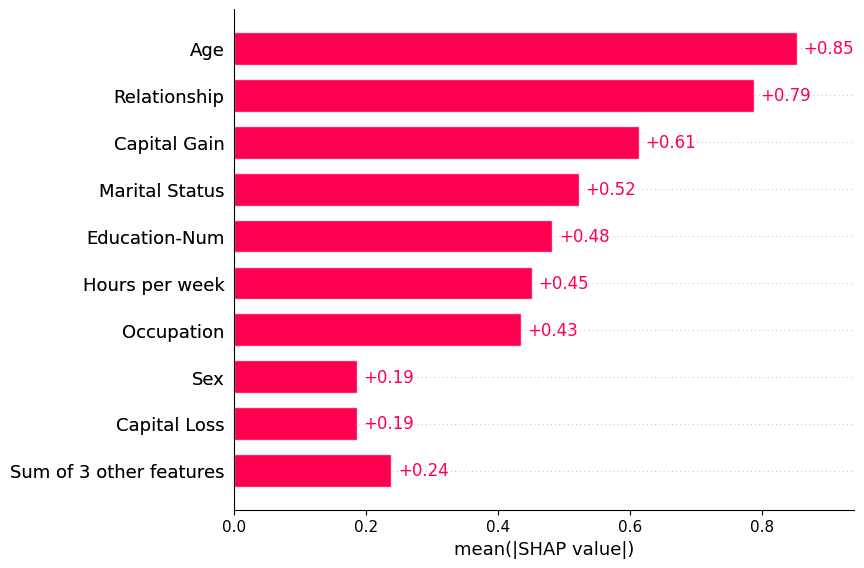

In [27]:
shap.plots.bar(shap_values)

In [ ]:
# Quest 1:  Which is the most important feature here ?

# Ans1: The most significant feature here is age having mean absolute SHAP value of 0.85 (Higher score indicates more influence)

In [ ]:
# Quest2:  What does 'Sum of 3 other features' indicate in the graph ?

"""
Ans2: It represents the combined effect of the 3 least important features in the dataset. 
(Sum of the mean absolute shap values of the least 3 important features as shap.plots.bar has max_display of features defaulted to 10)
"""

In [ ]:
# Quest3: Can you tell in which way features are affecting the final prediction - in a negative way or positive way ?
"""
Ans3: The golbal bar plot plots the mean absolute SHAP values against the features, hence it only shows influence of those features on
the final prediction, but not the direction of influence, i.e is the prediction influenced in a positive (Increasing) way or 
a negative way (Decreasing)
"""

# Summary Plot

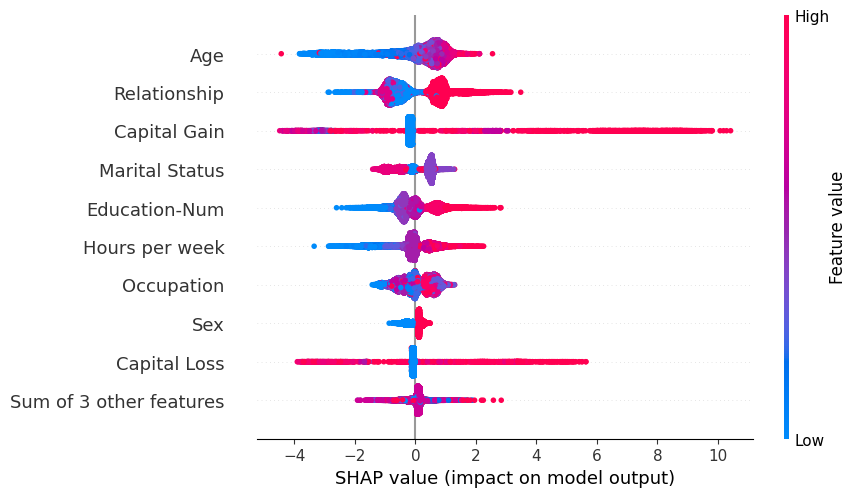

In [28]:
shap.plots.beeswarm(shap_values)

In [ ]:
# Quest 4: As the Age of a person increases, will it have a positive or negative impact on the final prediction ?
# Note: positive means income is >50k and negative means income is <=50k
"""
Ans 4: The age feature will have a positive impact on the final prediction

The high values are shown as red dots in the plot and these red dots are predominatly on the positive side of SHAP value axis 
SHAP value axis is at value 0 on X-axis which means a point lying on that has no influence on final prediction.
Hence, this feature has a positive impact on the final prediction.

"""

In [ ]:
# Quest 5: As the value for the number of hours per week increases, will it have a positive or negative impact on the final prediction ?
# Note: positive means income is >50k and negative means income is <=50k

"""
Ans 5: The high values are shown as red dots in the plot and these red dots are predominatly on the positive side of SHAP value axis 
SHAP value axis is at value 0 on X-axis which means a point lying on that has no influence on final prediction.
Hence, this feature has a positive impact on the final prediction.

"""

In [ ]:
# Quest 6: What Inference you can draw from the "Capital Gain" feature representation ? 

"""
Ans 6: If we observe the graph carefully there are majorly red dots for this feature and that too on the right side of SHAP value axis
Hence, this feature has a positive impact on the final prediction.

"""

In [ ]:
# Quest 7: '0' under the Sex feature stands for 'women' and '1' stands for 'male'. What can you infer about the sex feature from the graph ?

"""
Ans 7: 

We can infer that being male has a positive impact on the prediction, while being female has a negative impact.
The blue dots representing women are on the negatve side of the graph, while the red dots representing male are on the positive side.
If we observe the graph, we see that the red dots are tightly clustered on the right side of SHAP axis.
Hence, the model learns that being male has a higher probability of having an income higher than 50K.

"""

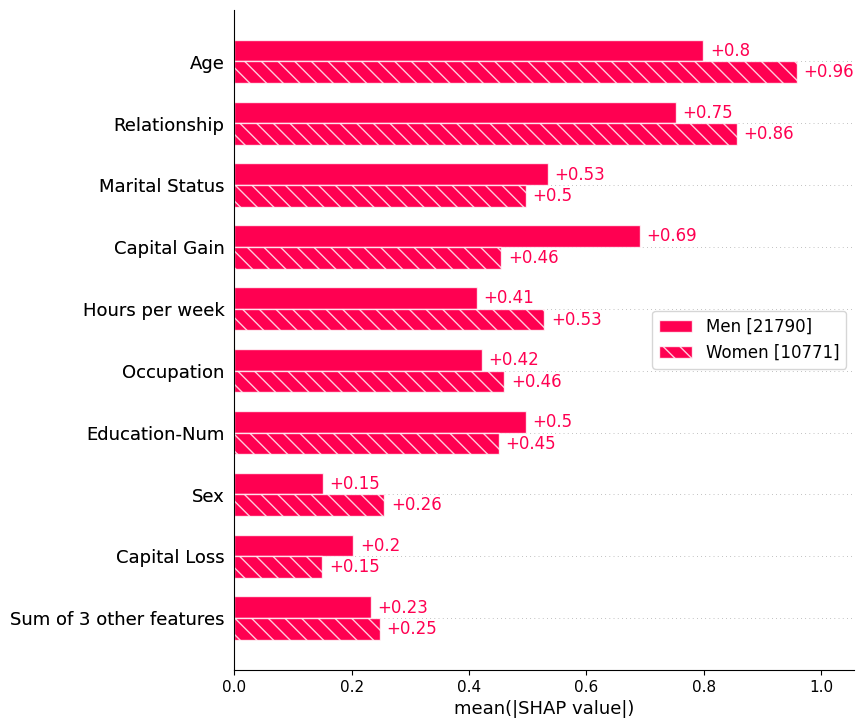

In [29]:
sex = ["Women" if shap_values[i,"Sex"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [ ]:
# Quest 8: What can you infer from the above graph ?

"""
Ans 8: The above graph is an example of a multiple-bar graph, comparing influence of different features on final prediction,
segregated for different genders.

1. Age, Relationship, and Hours Per Week have a higher mean absolute SHAP value for women than for men. 
This suggests these features are more influential in predicting income for women compared to men.

2. Capital Gain is a significantly more important feature for predicting the income of men than it is for women.

3. For all the other features, the importance is relatively similar between the two groups, although slight differences exist.

"""

# For analysis of the local effect of the features we can use the following plots.

# Local Bar Plot

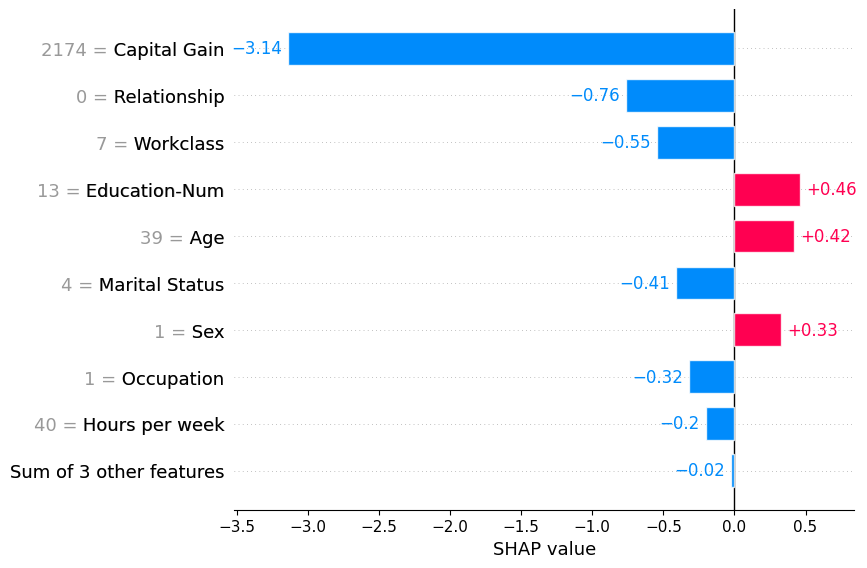

In [30]:
shap.plots.bar(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

In [ ]:
# Quest 9: The SHAP value for Capital Gain feature for one specific instance/row is -2.98. What does '-' sign indicate ? 
# Will it have positive or negative effect on final predction ?  

"""
Ans 9: The '-' sign indicates that the specific instance/row has a negative impact/influence on the final prediction.
Basically, for this instance the Capital Gain's value is pushing the model's prediction further lower, hence decreasing
the probability that their income is > $50k

"""

In [ ]:
# Quest 10: What can you say about the Occupation feature for the given instance/row.

"""
Ans 10: The occupation feature for specific has a negative impact/influence on the final prediction.
Basically, for this instance the Occupation value is pushing the model's prediction further lower, hence decreasing
the probability that their income is > $50k and increasing probability of income in lower-income category (<=$50k)
However, as the value is closer to default SHAP value axis, hence the impact is less significant than some highly influential 
features like Capital Gain and Relationship.

"""

# Waterfall plot

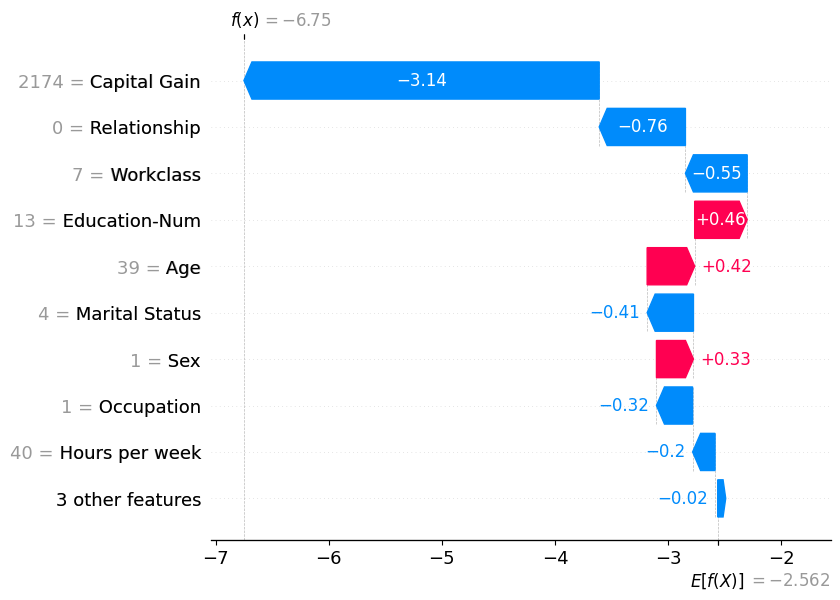

In [31]:
shap.plots.waterfall(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

In [ ]:
# Quest 11: Explain your observation with respect to the Sex feature as given in the graph.

"""
Ans 11: For this prediction, the feature Sex=1, which indicates Sex is Male has a positive SHAP value of +0.33, shown by the red bar.

This indicates that this feature for this prediction, pushes the model prediction much higher.

"""

# Force Plot

In [32]:
shap.initjs()
shap.force_plot(shap_values[0])

The force plot is another way to see the effect each feature has on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.